### Lab 6: Empirical comparison of classifiers over WTDT dataset 

In [2]:
#Import packages

import numpy as np
from numpy.typing import NDArray
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [3]:
#Auxiliary functions

def onehot2cat(y:NDArray) -> NDArray:
    '''Convert y in one_hot to categorical'''
    return np.argmax(y, axis=1) 


def loadDataset(fn:str, toCat:bool=False) -> NDArray:
    '''load dataset'''
    with open(fn, 'rb') as f:
        data = pickle.load(f)
        
    X = data['X'] 
    if toCat: y = onehot2cat(data['Y'])
    else:     y = data['Y'] 
    
    return X, y


def saveSKLModel(fn:str, model) -> None:
    '''save SKLearn model as pickle'''
    with open(fn, 'wb') as f:
        pickle.dump(model, f)
        

In [4]:
#load dataset

fnt = 'wtdt-part.pickle'
X, y = loadDataset(fnt, toCat=True)
print(X.shape)
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

(14000, 787)
(14000,)


In [ ]:
C = 5.41314288836357e-05
solver = 'saga'
model = LogisticRegression(C=C, solver=solver, max_iter=10000)
features = f"C={C}, solver={solver}"
model.fit(X_train, y_train)


In [17]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score


cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy for each fold:", cv_scores)

# Print the mean and standard deviation of the cross-validation scores
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation of Accuracy:", np.std(cv_scores))

Accuracy for each fold: [0.99955357 0.99955357 0.99910714 0.99955357 0.99866071]
Mean Accuracy: 0.9992857142857142
Standard Deviation of Accuracy: 0.0003571428571428503


In [7]:
saveSKLModel("T1-randomForest.pickle", model)

# Regularized Logistic Regression

In [ ]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Initialize Logistic Regression model with regularization (default is L2 regularization)
# Setting 'C' to a smaller value increases regularization
model = LogisticRegression(C=0.01, penalty='l2',  solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Save the trained model
saveSKLModel('logistic_regression_model.pkl', model)


Accuracy: 0.9942857142857143


c:\Users\a932443\OneDrive - Eviden\Desktop\Uni\AM\.venv\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [5]:
from sklearn.model_selection import GridSearchCV

# Define a range of C values to test
param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

# Initialize Logistic Regression model
log_reg = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')

# Set up GridSearchCV to find the best C value
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best regularization parameter
best_C = grid_search.best_params_['C']
print("Best regularization parameter (C):", best_C)

# Train the model again using the best C value
best_model = LogisticRegression(C=best_C, penalty='l2', max_iter=1000, solver='liblinear')
best_model.fit(X_train, y_train)

# Make predictions and evaluate accuracy
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Optimized Accuracy:", accuracy)

# Save the best model
saveSKLModel('optimized_logistic_regression_model.pkl', best_model)


Best regularization parameter (C): 0.01
Optimized Accuracy: 0.9971428571428571


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy with scaled features:", accuracy)


Accuracy with scaled features: 0.9942857142857143


Class distribution: {np.int64(0): np.int64(2000), np.int64(1): np.int64(2000), np.int64(2): np.int64(2000), np.int64(3): np.int64(2000), np.int64(4): np.int64(2000), np.int64(5): np.int64(2000), np.int64(6): np.int64(2000)}


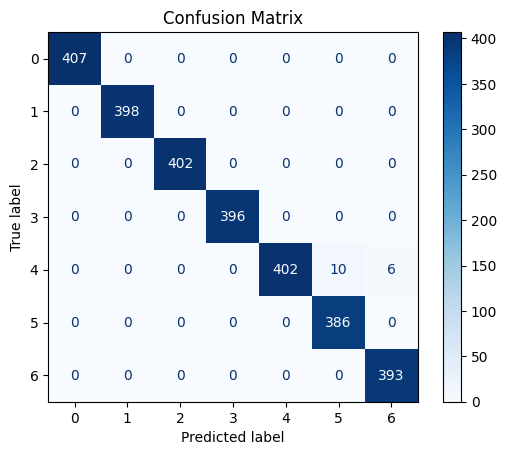

In [22]:
# Import necessary libraries for evaluation
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Check class distribution
unique, counts = np.unique(y, return_counts=True)
class_distribution = dict(zip(unique, counts))
print("Class distribution:", class_distribution)

# Make predictions on the test set if not done already
y_pred = model.predict(X_test_scaled)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.unique(y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Regularized Logistic Regression with mini batch training

In [7]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter grid
batch_sizes = [16, 32, 64]
learning_rates = [0.01, 0.001, 0.0001]
iterations = [50, 100, 200]

# Variables to track the best combination
best_acc = 0
best_params = None

# Grid search loop
for batch_size in batch_sizes:
    for learning_rate in learning_rates:
        for n_epochs in iterations:
            print(f"Testing batch_size={batch_size}, learning_rate={learning_rate}, n_epochs={n_epochs}")
            
            # Initialize classifier with the current learning rate
            clf = SGDClassifier(loss='hinge', learning_rate='constant', eta0=learning_rate, random_state=42)
            
            # Define parameters
            samples = X_train.shape[0]
            rng = np.random.default_rng(seed=0)
            
            # Training loop
            for epoch in range(n_epochs):
                # Shuffle before each epoch
                p = rng.permutation(samples)
                Xr = X_train[p, :]
                yr = y_train[p]
                
                # Train for each mini-batch
                for bs in range(0, samples, batch_size):
                    Xi = Xr[bs:bs + batch_size, :]
                    yi = yr[bs:bs + batch_size]
                    
                    # Train on batch using partial_fit
                    clf.partial_fit(Xi, yi, classes=np.unique(y_train))
            
            # Evaluate accuracy after all epochs
            acc = clf.score(X_test, y_test)
            print(f"Accuracy: {acc:.5f}")
            
            # Update best parameters if accuracy improves
            if acc > best_acc:
                best_acc = acc
                best_params = {
                    "batch_size": batch_size,
                    "learning_rate": learning_rate,
                    "n_epochs": n_epochs,
                }

# Final output
print(f"Best accuracy: {best_acc:.5f}")
print(f"Best parameters: {best_params}")


Testing batch_size=16, learning_rate=0.01, n_epochs=50
Accuracy: 0.50429
Testing batch_size=16, learning_rate=0.01, n_epochs=100
Accuracy: 0.90143
Testing batch_size=16, learning_rate=0.01, n_epochs=200
Accuracy: 0.65036
Testing batch_size=16, learning_rate=0.001, n_epochs=50
Accuracy: 0.57679
Testing batch_size=16, learning_rate=0.001, n_epochs=100
Accuracy: 0.82250
Testing batch_size=16, learning_rate=0.001, n_epochs=200
Accuracy: 0.92929
Testing batch_size=16, learning_rate=0.0001, n_epochs=50
Accuracy: 0.59071
Testing batch_size=16, learning_rate=0.0001, n_epochs=100
Accuracy: 0.91250
Testing batch_size=16, learning_rate=0.0001, n_epochs=200
Accuracy: 0.93000
Testing batch_size=32, learning_rate=0.01, n_epochs=50
Accuracy: 0.57321
Testing batch_size=32, learning_rate=0.01, n_epochs=100
Accuracy: 0.81321
Testing batch_size=32, learning_rate=0.01, n_epochs=200
Accuracy: 0.65857
Testing batch_size=32, learning_rate=0.001, n_epochs=50
Accuracy: 0.59893
Testing batch_size=32, learning_r

In [28]:
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.905


# Naïve Bayes classifier

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create the Naive Bayes model (MultinomialNB for discrete data)
model_nb = GaussianNB()

model_nb.fit(X_train, y_train)

y_pred = model_nb.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")



Accuracy: 0.9896428571428572
